<br>
<br>

# 20 Newsgroups Dataset Assignment: Text Classification and Clustering

<br>
<br>


1. Part 1: Text Pre-processing and Embedding Comparison (20 Points)
   - Preprocessing steps correctly implemented and explained 
   - Comparison of word2vec, GloVe, and OpenAI embeddings
   - Discussion on the embeddings that provide better semantic understanding
<br>
<br>


2. Part 2: Text Classification Model (20 Points)
   - Correct implementation of chosen classification model
   - Comprehensive discussion on the choice of model, including its advantages and disadvantages
<br>
<br>



3. Part 3: Text Clustering Model (20 Points)
   - Correct implementation of chosen clustering model
   - Comprehensive discussion on the choice of model, including its pros and cons
<br>
<br>



4. Part 4: Model Evaluation (20 Points)
   - Appropriate metrics chosen and correctly used to evaluate models
   - Comprehensive discussion on the choice of metrics
<br>
<br>


5. Part 5: Model Improvement Discussion (20 Points)
   - Comprehensive discussion on potential improvements, including handling unbalanced data, dealing with slang, abbreviations    or typos, and addressing context and word disambiguation challenges
   <br>
<br>


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Loading various libraries required for this assignment

In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import gensim
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import random
from gensim.models import KeyedVectors
import os
from gensim.scripts.glove2word2vec import glove2word2vec

#### Importing the 20newsgroup data and finding the class distribution of the train and test data

In [3]:
data=fetch_20newsgroups()

In [4]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

#### Training data class distribution

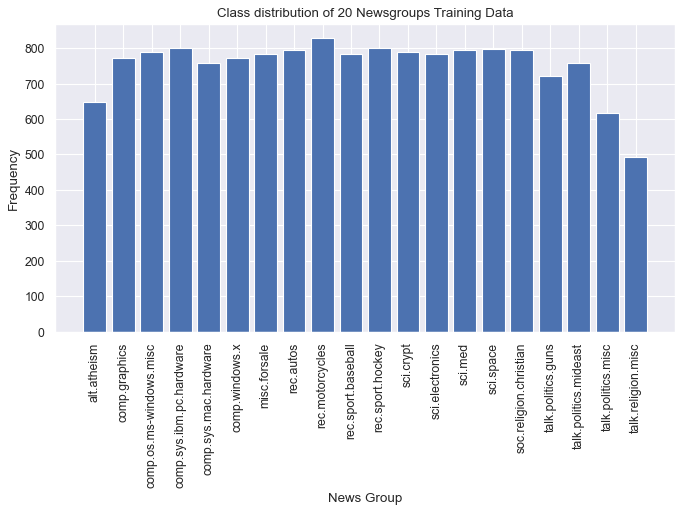

In [8]:
# Finding frequency of each category
targets, frequency = np.unique(y_train, return_counts=True)

targets_str = np.array(data.target_names)

# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

#### Testing data class distribution

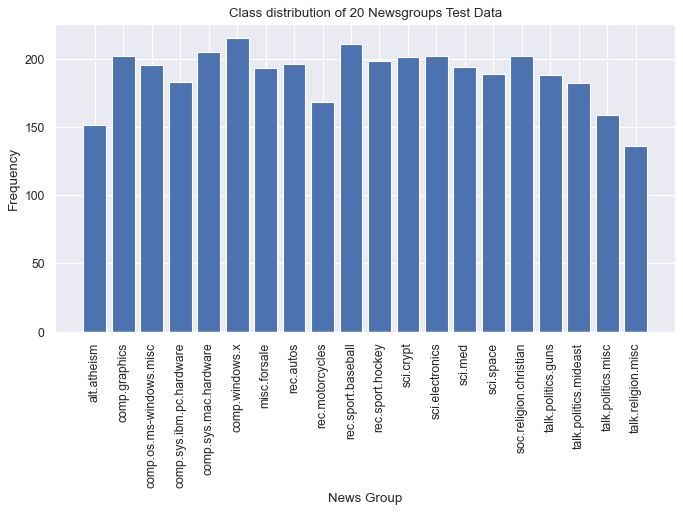

In [9]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(y_test, return_counts=True)

targets_test_str = np.array(data.target_names)

#Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

#### From the above bar graphs, we see that all the categories have decent amount of samples which implies that it doesn't have high data imbalance

# Part 1: Text Pre-processing and Embedding Comparison

# Text Preprocessing

After loading the data and splitting it into training and testing sets...we'll then perfom data preprocessing on the training and testing sets.
<br>
<br>
The following text preprocessing steps are employed:<br>
1.Removing special characters<br>
2.Striping off the extra white spaces<br>
3.Removing stop words<br>
4.Tokenizing the text<br>
5.Lemmatizing the tokenized text<br>
6.Removing the words with length equal to 1 as they don't have any specific context to help out in our data model<br>

In [10]:
#In the following method, the entire text is lower-cased, stripped off of the excess white spaces 
#and non-word,non-digit characters are removed

def clean_text(text):
    text=text.lower()
    text=text.strip()
    text=re.sub(r'\W+|\d+',' ',text)
    return text

In [11]:
#Download punkt only once
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adeebafa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#Here the text is tokenized

def tokenize_text(text):
    tokens=nltk.word_tokenize(text)
    return tokens

In [13]:
#Download stopwords corpus only once
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeebafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#In this method, the stop-words pre-defined are removed from our list of tokens
def remove_stop_words(tokens_text):
    stop_words=set(stopwords.words('english'))
    stop_words_free_tokens=[token for token in tokens_text if token not in stop_words]
    return stop_words_free_tokens


In [15]:
#Download only once
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adeebafa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
#In this method, all the tokens in our text is lemmatized
def lemmatize(tokenized_text):
    
    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each word in the tokens list
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokenized_text]
    
    return lemmatized_tokens

In [17]:
#In the following method, the words/tokens with length=1 are removed as they do no define any context 
def remove_single_characters(tokens_text):
    filtered_tokens=[token for token in tokens_text if len(token)>1]
    return filtered_tokens


#### Using the above methods to clean and filter the training data

In [18]:
clean_train_data=[clean_text(text) for text in X_train]
print(clean_train_data[0])

from mahan tgv com patrick l mahan subject re is it just me or is this newsgroup dead organization the internet lines   nntp posting host enterpoop mit edu to xpert expo lcs mit edu rlm helen surfcty com i ve gotten very few posts on this group in the last couple days i recently added it to my feed list is it just me or is this group near death seen from the mailing list side i m getting about the right amount of traffic patrick l mahan tgv window washer mahan tgv com waking a person unnecessarily should not be considered lazarus long a capital crime for a first offense that is from the notebooks of lazarus long patrick l mahan tgv window washer mahan tgv com waking a person unnecessarily should not be considered lazarus long a capital crime for a first offense that is from the notebooks of lazarus long


In [19]:
tokenized_train_data=[tokenize_text(text) for text in clean_train_data]
print(tokenized_train_data[0])

['from', 'mahan', 'tgv', 'com', 'patrick', 'l', 'mahan', 'subject', 're', 'is', 'it', 'just', 'me', 'or', 'is', 'this', 'newsgroup', 'dead', 'organization', 'the', 'internet', 'lines', 'nntp', 'posting', 'host', 'enterpoop', 'mit', 'edu', 'to', 'xpert', 'expo', 'lcs', 'mit', 'edu', 'rlm', 'helen', 'surfcty', 'com', 'i', 've', 'gotten', 'very', 'few', 'posts', 'on', 'this', 'group', 'in', 'the', 'last', 'couple', 'days', 'i', 'recently', 'added', 'it', 'to', 'my', 'feed', 'list', 'is', 'it', 'just', 'me', 'or', 'is', 'this', 'group', 'near', 'death', 'seen', 'from', 'the', 'mailing', 'list', 'side', 'i', 'm', 'getting', 'about', 'the', 'right', 'amount', 'of', 'traffic', 'patrick', 'l', 'mahan', 'tgv', 'window', 'washer', 'mahan', 'tgv', 'com', 'waking', 'a', 'person', 'unnecessarily', 'should', 'not', 'be', 'considered', 'lazarus', 'long', 'a', 'capital', 'crime', 'for', 'a', 'first', 'offense', 'that', 'is', 'from', 'the', 'notebooks', 'of', 'lazarus', 'long', 'patrick', 'l', 'mahan',

In [20]:
filtered_stop_words_train_data=[remove_stop_words(tokens) for tokens in tokenized_train_data]
print(filtered_stop_words_train_data[0])

['mahan', 'tgv', 'com', 'patrick', 'l', 'mahan', 'subject', 'newsgroup', 'dead', 'organization', 'internet', 'lines', 'nntp', 'posting', 'host', 'enterpoop', 'mit', 'edu', 'xpert', 'expo', 'lcs', 'mit', 'edu', 'rlm', 'helen', 'surfcty', 'com', 'gotten', 'posts', 'group', 'last', 'couple', 'days', 'recently', 'added', 'feed', 'list', 'group', 'near', 'death', 'seen', 'mailing', 'list', 'side', 'getting', 'right', 'amount', 'traffic', 'patrick', 'l', 'mahan', 'tgv', 'window', 'washer', 'mahan', 'tgv', 'com', 'waking', 'person', 'unnecessarily', 'considered', 'lazarus', 'long', 'capital', 'crime', 'first', 'offense', 'notebooks', 'lazarus', 'long', 'patrick', 'l', 'mahan', 'tgv', 'window', 'washer', 'mahan', 'tgv', 'com', 'waking', 'person', 'unnecessarily', 'considered', 'lazarus', 'long', 'capital', 'crime', 'first', 'offense', 'notebooks', 'lazarus', 'long']


In [21]:
lemmatized_train_data=[lemmatize(text) for text in filtered_stop_words_train_data]
print(lemmatized_train_data[0])

['mahan', 'tgv', 'com', 'patrick', 'l', 'mahan', 'subject', 'newsgroup', 'dead', 'organization', 'internet', 'line', 'nntp', 'posting', 'host', 'enterpoop', 'mit', 'edu', 'xpert', 'expo', 'lcs', 'mit', 'edu', 'rlm', 'helen', 'surfcty', 'com', 'gotten', 'post', 'group', 'last', 'couple', 'day', 'recently', 'added', 'feed', 'list', 'group', 'near', 'death', 'seen', 'mailing', 'list', 'side', 'getting', 'right', 'amount', 'traffic', 'patrick', 'l', 'mahan', 'tgv', 'window', 'washer', 'mahan', 'tgv', 'com', 'waking', 'person', 'unnecessarily', 'considered', 'lazarus', 'long', 'capital', 'crime', 'first', 'offense', 'notebook', 'lazarus', 'long', 'patrick', 'l', 'mahan', 'tgv', 'window', 'washer', 'mahan', 'tgv', 'com', 'waking', 'person', 'unnecessarily', 'considered', 'lazarus', 'long', 'capital', 'crime', 'first', 'offense', 'notebook', 'lazarus', 'long']


In [22]:
final_filtered_train_data=[remove_single_characters(tokens) for tokens in lemmatized_train_data]
print(final_filtered_train_data[0])

['mahan', 'tgv', 'com', 'patrick', 'mahan', 'subject', 'newsgroup', 'dead', 'organization', 'internet', 'line', 'nntp', 'posting', 'host', 'enterpoop', 'mit', 'edu', 'xpert', 'expo', 'lcs', 'mit', 'edu', 'rlm', 'helen', 'surfcty', 'com', 'gotten', 'post', 'group', 'last', 'couple', 'day', 'recently', 'added', 'feed', 'list', 'group', 'near', 'death', 'seen', 'mailing', 'list', 'side', 'getting', 'right', 'amount', 'traffic', 'patrick', 'mahan', 'tgv', 'window', 'washer', 'mahan', 'tgv', 'com', 'waking', 'person', 'unnecessarily', 'considered', 'lazarus', 'long', 'capital', 'crime', 'first', 'offense', 'notebook', 'lazarus', 'long', 'patrick', 'mahan', 'tgv', 'window', 'washer', 'mahan', 'tgv', 'com', 'waking', 'person', 'unnecessarily', 'considered', 'lazarus', 'long', 'capital', 'crime', 'first', 'offense', 'notebook', 'lazarus', 'long']


#### Using the above methods to preprocess the test data

In [23]:
clean_test_data=[clean_text(text) for text in X_test]
print(clean_test_data[0])

from shippert cco caltech edu tim shippert subject re infield fly rule organization california institute of technology pasadena lines   nntp posting host sandman caltech edu jrogoff scott skidmore edu jay rogoff writes one last infield fly question that has always puzzled me and hasn t yet been addressed i believe the rule also does not deal with this situation however if the infield fly is not caught at what point can a runner legally leave his base w o fear of being doubled off for advancing too early the runner can leave his base at any time if the ball is caught he s got to tag up if it isn t caught he _doesn t_ have to tag up at all so if he s feeling lucky your runner at second can sprint for glory as soon as the ball is popped up if it isn t caught he s probably scored a run if it is he s probably headed for aaa the only effect the infield fly has is to make the batter out thereby removing the force on the runners on base all other rules apply as if you were standing second with

In [24]:
tokenized_test_data=[tokenize_text(text) for text in clean_test_data]
print(tokenized_test_data[0])

['from', 'shippert', 'cco', 'caltech', 'edu', 'tim', 'shippert', 'subject', 're', 'infield', 'fly', 'rule', 'organization', 'california', 'institute', 'of', 'technology', 'pasadena', 'lines', 'nntp', 'posting', 'host', 'sandman', 'caltech', 'edu', 'jrogoff', 'scott', 'skidmore', 'edu', 'jay', 'rogoff', 'writes', 'one', 'last', 'infield', 'fly', 'question', 'that', 'has', 'always', 'puzzled', 'me', 'and', 'hasn', 't', 'yet', 'been', 'addressed', 'i', 'believe', 'the', 'rule', 'also', 'does', 'not', 'deal', 'with', 'this', 'situation', 'however', 'if', 'the', 'infield', 'fly', 'is', 'not', 'caught', 'at', 'what', 'point', 'can', 'a', 'runner', 'legally', 'leave', 'his', 'base', 'w', 'o', 'fear', 'of', 'being', 'doubled', 'off', 'for', 'advancing', 'too', 'early', 'the', 'runner', 'can', 'leave', 'his', 'base', 'at', 'any', 'time', 'if', 'the', 'ball', 'is', 'caught', 'he', 's', 'got', 'to', 'tag', 'up', 'if', 'it', 'isn', 't', 'caught', 'he', '_doesn', 't_', 'have', 'to', 'tag', 'up', 'a

In [25]:
filtered_stop_words_test_data=[remove_stop_words(tokens) for tokens in tokenized_test_data]
print(filtered_stop_words_test_data[0])

['shippert', 'cco', 'caltech', 'edu', 'tim', 'shippert', 'subject', 'infield', 'fly', 'rule', 'organization', 'california', 'institute', 'technology', 'pasadena', 'lines', 'nntp', 'posting', 'host', 'sandman', 'caltech', 'edu', 'jrogoff', 'scott', 'skidmore', 'edu', 'jay', 'rogoff', 'writes', 'one', 'last', 'infield', 'fly', 'question', 'always', 'puzzled', 'yet', 'addressed', 'believe', 'rule', 'also', 'deal', 'situation', 'however', 'infield', 'fly', 'caught', 'point', 'runner', 'legally', 'leave', 'base', 'w', 'fear', 'doubled', 'advancing', 'early', 'runner', 'leave', 'base', 'time', 'ball', 'caught', 'got', 'tag', 'caught', '_doesn', 't_', 'tag', 'feeling', 'lucky', 'runner', 'second', 'sprint', 'glory', 'soon', 'ball', 'popped', 'caught', 'probably', 'scored', 'run', 'probably', 'headed', 'aaa', 'effect', 'infield', 'fly', 'make', 'batter', 'thereby', 'removing', 'force', 'runners', 'base', 'rules', 'apply', 'standing', 'second', 'first', 'open', 'ball', 'popped', 'tim', 'shipper

In [26]:
lemmatized_test_data=[lemmatize(text) for text in filtered_stop_words_test_data]
print(lemmatized_test_data[0])

['shippert', 'cco', 'caltech', 'edu', 'tim', 'shippert', 'subject', 'infield', 'fly', 'rule', 'organization', 'california', 'institute', 'technology', 'pasadena', 'line', 'nntp', 'posting', 'host', 'sandman', 'caltech', 'edu', 'jrogoff', 'scott', 'skidmore', 'edu', 'jay', 'rogoff', 'writes', 'one', 'last', 'infield', 'fly', 'question', 'always', 'puzzled', 'yet', 'addressed', 'believe', 'rule', 'also', 'deal', 'situation', 'however', 'infield', 'fly', 'caught', 'point', 'runner', 'legally', 'leave', 'base', 'w', 'fear', 'doubled', 'advancing', 'early', 'runner', 'leave', 'base', 'time', 'ball', 'caught', 'got', 'tag', 'caught', '_doesn', 't_', 'tag', 'feeling', 'lucky', 'runner', 'second', 'sprint', 'glory', 'soon', 'ball', 'popped', 'caught', 'probably', 'scored', 'run', 'probably', 'headed', 'aaa', 'effect', 'infield', 'fly', 'make', 'batter', 'thereby', 'removing', 'force', 'runner', 'base', 'rule', 'apply', 'standing', 'second', 'first', 'open', 'ball', 'popped', 'tim', 'shippert',

In [27]:
final_filtered_test_data=[remove_single_characters(tokens) for tokens in lemmatized_test_data]
print(final_filtered_test_data[0])

['shippert', 'cco', 'caltech', 'edu', 'tim', 'shippert', 'subject', 'infield', 'fly', 'rule', 'organization', 'california', 'institute', 'technology', 'pasadena', 'line', 'nntp', 'posting', 'host', 'sandman', 'caltech', 'edu', 'jrogoff', 'scott', 'skidmore', 'edu', 'jay', 'rogoff', 'writes', 'one', 'last', 'infield', 'fly', 'question', 'always', 'puzzled', 'yet', 'addressed', 'believe', 'rule', 'also', 'deal', 'situation', 'however', 'infield', 'fly', 'caught', 'point', 'runner', 'legally', 'leave', 'base', 'fear', 'doubled', 'advancing', 'early', 'runner', 'leave', 'base', 'time', 'ball', 'caught', 'got', 'tag', 'caught', '_doesn', 't_', 'tag', 'feeling', 'lucky', 'runner', 'second', 'sprint', 'glory', 'soon', 'ball', 'popped', 'caught', 'probably', 'scored', 'run', 'probably', 'headed', 'aaa', 'effect', 'infield', 'fly', 'make', 'batter', 'thereby', 'removing', 'force', 'runner', 'base', 'rule', 'apply', 'standing', 'second', 'first', 'open', 'ball', 'popped', 'tim', 'shippert', 'shi

# Embeddings

### Word2Vec Embedding

In [28]:
embedding_dim = 100  # The embedding dimension can be adjusted as required

#Generating a word2vec embedding model with the train dataset
w2v_model = gensim.models.Word2Vec(final_filtered_train_data, vector_size=embedding_dim, window=5, min_count=2)

In [29]:
#Verifying the working of the word2vec embedding with our training data
w2v_model.wv.most_similar('love')

[('sinner', 0.8222017288208008),
 ('hate', 0.7879981994628906),
 ('bless', 0.7810607552528381),
 ('dream', 0.7720659971237183),
 ('fear', 0.7652745842933655),
 ('truly', 0.7625439167022705),
 ('sake', 0.7564387321472168),
 ('loved', 0.7551110982894897),
 ('die', 0.753424346446991),
 ('satan', 0.7503572702407837)]

In [30]:
w2v_model.wv.most_similar('hello')

[('hi', 0.895488977432251),
 ('netters', 0.7659033536911011),
 ('greeting', 0.7289592623710632),
 ('urbana', 0.7280330657958984),
 ('wonderring', 0.704498827457428),
 ('howdy', 0.7009691596031189),
 ('recently', 0.696877121925354),
 ('somone', 0.6801307201385498),
 ('sip', 0.6733159422874451),
 ('twics', 0.6538503766059875)]

In [31]:
w2v_model.wv.most_similar(positive=['king','woman'],negative=['man'])

[('teenager', 0.7568801045417786),
 ('boy', 0.753685474395752),
 ('shame', 0.7536634206771851),
 ('rodney', 0.7420300841331482),
 ('remind', 0.7203116416931152),
 ('wife', 0.7187706232070923),
 ('asshole', 0.7010509371757507),
 ('harry', 0.688518762588501),
 ('birthday', 0.686959445476532),
 ('congratulation', 0.6862420439720154)]

In [32]:
# Convert train data to Word2Vec embeddings
X_train_w2v_embeddings = np.array([
    np.mean([w2v_model.wv[word] for word in news_article if word in w2v_model.wv], axis=0)
    for news_article in final_filtered_train_data
])

In [33]:
# Convert test data to Word2Vec embeddings
X_test_w2v_embeddings = np.array([
    np.mean([w2v_model.wv[word] for word in news_article if word in w2v_model.wv], axis=0)
    for news_article in final_filtered_test_data
])

### GloVe Embedding

In [34]:
#You'll have to downloaded the pre-trained GloVe word embeddings file and stored it locally at the below mentioned path
glove_file = 'Downloads/glove.6B/glove.6B.100d.txt'

In [35]:
# Load the GloVe embeddings using the below function, it returns the word vectors the words in the dataset 
def load_glove_embeddings(file):
    embeddings_index = {}
    with open(file, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

In [36]:
glove_embeddings = load_glove_embeddings(glove_file)

In [80]:
#This function will generate the word embeddings for each document, 
#averaging the word embeddings for the words in each document.
#The resulting matrix embeddings_matrix will have dimensions (number of documents, embedding dimension),
#where each row represents the word embeddings for a document.

def generate_glove_embeddings(word_sequences, embeddings_index, embedding_dim):
    embeddings_matrix = np.zeros((len(word_sequences), embedding_dim))
    for i, word_seq in enumerate(word_sequences):
        doc_embeddings = np.zeros(embedding_dim)
        count = 0
        for word in word_seq:
            if word in embeddings_index:
                doc_embeddings += embeddings_index[word]
                count += 1
        if count > 0:
            doc_embeddings /= count
        embeddings_matrix[i] = doc_embeddings
    return embeddings_matrix

In [38]:
#Passing the training, testing data and glove_embeddings as arguments to the above written function
X_train_gloVe_embeddings = generate_glove_embeddings(final_filtered_train_data, glove_embeddings,embedding_dim)
X_test_gloVe_embeddings = generate_glove_embeddings(final_filtered_test_data, glove_embeddings,embedding_dim)

### FastText Embedding

In [39]:
from gensim.models import FastText
fastText_model = FastText(final_filtered_train_data, vector_size=100, window=5, min_count=5, workers=4,sg=1)

In [40]:
fastText_model.wv.most_similar("love")

[('loved', 0.721694827079773),
 ('lover', 0.6918902397155762),
 ('_love_', 0.6734111309051514),
 ('hinnom', 0.6699802875518799),
 ('sinner', 0.6641577482223511),
 ('lovely', 0.6571069955825806),
 ('forgive', 0.6547476053237915),
 ('tove', 0.6539899110794067),
 ('weird', 0.6511779427528381),
 ('gracious', 0.6505542993545532)]

In [41]:
# Generate FastText embeddings for the text data

def generate_fastText_embeddings(word_sequences, fastText_model, embedding_dim):
    embeddings_matrix = np.zeros((len(word_sequences), embedding_dim))
    for i, word_seq in enumerate(word_sequences):
        doc_embeddings = np.zeros(embedding_dim)
        count = 0
        for word in word_seq:
            if word in fastText_model.wv:
                doc_embeddings += fastText_model.wv[word]
                count += 1
        if count > 0:
            doc_embeddings /= count
        embeddings_matrix[i] = doc_embeddings
    return embeddings_matrix

In [42]:
X_train_fastText_embeddings = generate_fastText_embeddings(final_filtered_train_data,fastText_model,embedding_dim)
X_test_fastText_embeddings = generate_fastText_embeddings(final_filtered_test_data,fastText_model,embedding_dim)

### Discussion on the different embedding methods used for the dataset

Evaluating the performance in capturing semantic relationships and representing the meaning of words and documents for the word2vec, GloVe, and fastText methods would require following points to be considered.

<b>word2vec:</b> Word2vec is a popular embedding method that learns word representations based on the context in which words appear. It captures semantic relationships by mapping similar words closer together in the embedding space. This method has been widely used and has shown good performance in various natural language processing tasks. However, word2vec may struggle with out-of-vocabulary words and rare terms.

<b>GloVe:</b> GloVe (Global Vectors for Word Representation) is another popular embedding method that combines word co-occurrence statistics with global context information. It aims to capture both local and global semantic relationships between words. GloVe embeddings are trained on large corpora, enabling them to capture finer semantic nuances. It generally performs well in capturing semantic similarities and analogies.

<b>fastText:</b> fastText is an extension of word2vec that takes into account subword information. It represents words as bags of character n-grams, allowing it to handle out-of-vocabulary words and capture morphological similarities. This makes fastText particularly useful for tasks involving morphologically rich languages and handling rare words. It also performs well in capturing semantic relationships and has shown competitive performance in various tasks.

One would also need to consider the dataset being used as each embedding method has its own weakness and strengths, and their effectiveness can vary depending on the nature of the data.


# Part 2: Text Classification Model

# SVM Classification

## Using Word2Vec Embedding

In [43]:
# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_w2v_embeddings, y_train)

SVC(kernel='linear')

In [44]:
# Make predictions on the test set
y_pred = svm.predict(X_test_w2v_embeddings)

In [45]:
# Evaluate the model
print(classification_report(y_test, y_pred, target_names=data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.61      0.68      0.64       151
           comp.graphics       0.59      0.68      0.63       202
 comp.os.ms-windows.misc       0.61      0.66      0.63       195
comp.sys.ibm.pc.hardware       0.51      0.55      0.53       183
   comp.sys.mac.hardware       0.67      0.55      0.60       205
          comp.windows.x       0.77      0.71      0.74       215
            misc.forsale       0.69      0.67      0.68       193
               rec.autos       0.71      0.69      0.70       196
         rec.motorcycles       0.68      0.76      0.72       168
      rec.sport.baseball       0.79      0.80      0.80       211
        rec.sport.hockey       0.83      0.84      0.83       198
               sci.crypt       0.91      0.84      0.87       201
         sci.electronics       0.67      0.64      0.66       202
                 sci.med       0.72      0.79      0.75       194
         

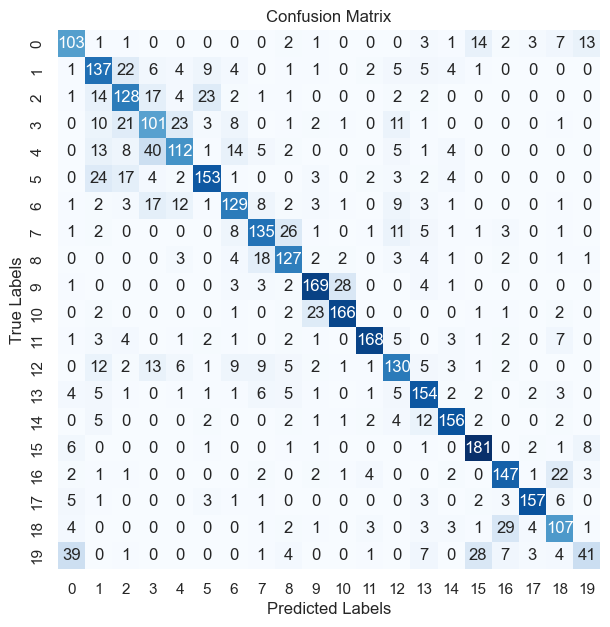

In [46]:
#Confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Using gloVe Embedding

In [47]:
# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_gloVe_embeddings, y_train)

SVC(kernel='linear')

In [48]:
# Make predictions on the test set
y_pred_gloVe = svm.predict(X_test_gloVe_embeddings)

In [49]:
# Evaluate the model
print(classification_report(y_test, y_pred_gloVe, target_names=data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.52      0.63      0.57       151
           comp.graphics       0.55      0.58      0.56       202
 comp.os.ms-windows.misc       0.49      0.53      0.51       195
comp.sys.ibm.pc.hardware       0.42      0.50      0.46       183
   comp.sys.mac.hardware       0.54      0.46      0.50       205
          comp.windows.x       0.58      0.56      0.57       215
            misc.forsale       0.63      0.65      0.64       193
               rec.autos       0.76      0.70      0.73       196
         rec.motorcycles       0.71      0.76      0.73       168
      rec.sport.baseball       0.87      0.88      0.88       211
        rec.sport.hockey       0.91      0.91      0.91       198
               sci.crypt       0.77      0.72      0.74       201
         sci.electronics       0.59      0.56      0.57       202
                 sci.med       0.86      0.86      0.86       194
         

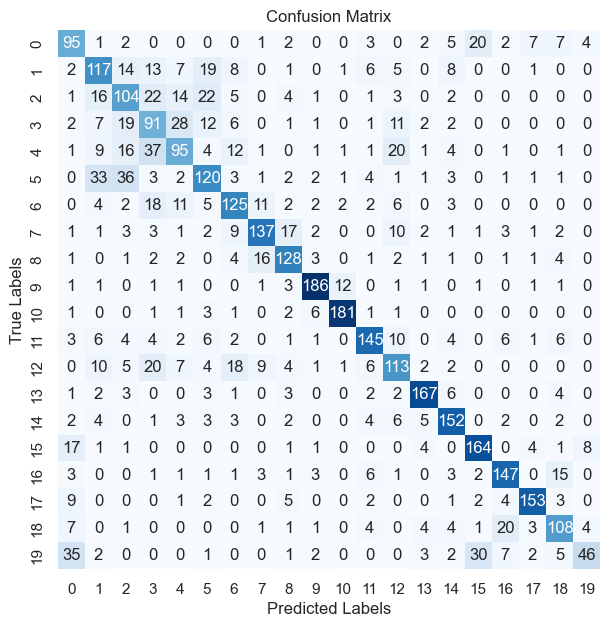

In [50]:
#Confusion matrix for the model
cm = confusion_matrix(y_test, y_pred_gloVe)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Using FastText Embedding

In [51]:
svm.fit(X_train_fastText_embeddings, y_train)

SVC(kernel='linear')

In [52]:
# Make predictions on the test set
y_pred_fastText = svm.predict(X_test_fastText_embeddings)

In [53]:
# Evaluate the model
print(classification_report(y_test, y_pred_fastText, target_names=data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.81      0.80       151
           comp.graphics       0.64      0.75      0.69       202
 comp.os.ms-windows.misc       0.67      0.69      0.68       195
comp.sys.ibm.pc.hardware       0.55      0.60      0.57       183
   comp.sys.mac.hardware       0.76      0.65      0.70       205
          comp.windows.x       0.85      0.77      0.81       215
            misc.forsale       0.75      0.69      0.72       193
               rec.autos       0.81      0.82      0.81       196
         rec.motorcycles       0.88      0.86      0.87       168
      rec.sport.baseball       0.86      0.90      0.88       211
        rec.sport.hockey       0.90      0.90      0.90       198
               sci.crypt       0.96      0.89      0.93       201
         sci.electronics       0.72      0.75      0.73       202
                 sci.med       0.89      0.93      0.91       194
         

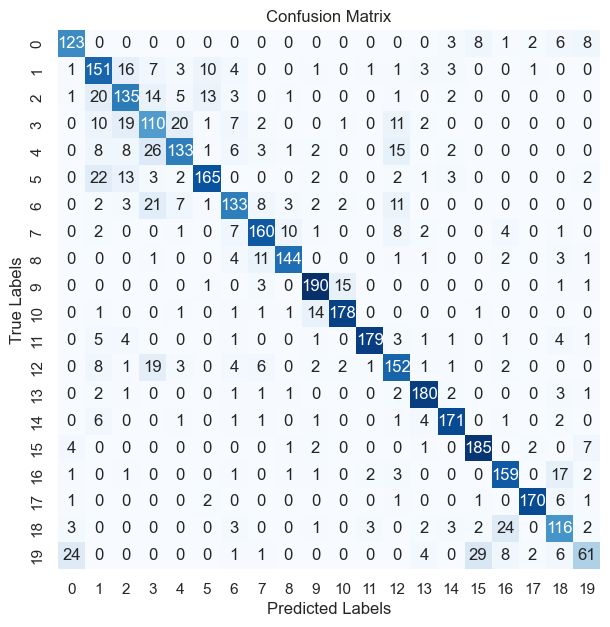

In [54]:
#Confusion matrix for the model
cm = confusion_matrix(y_test, y_pred_fastText)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Visualizing the metrics to depict the performance of the embedding methods

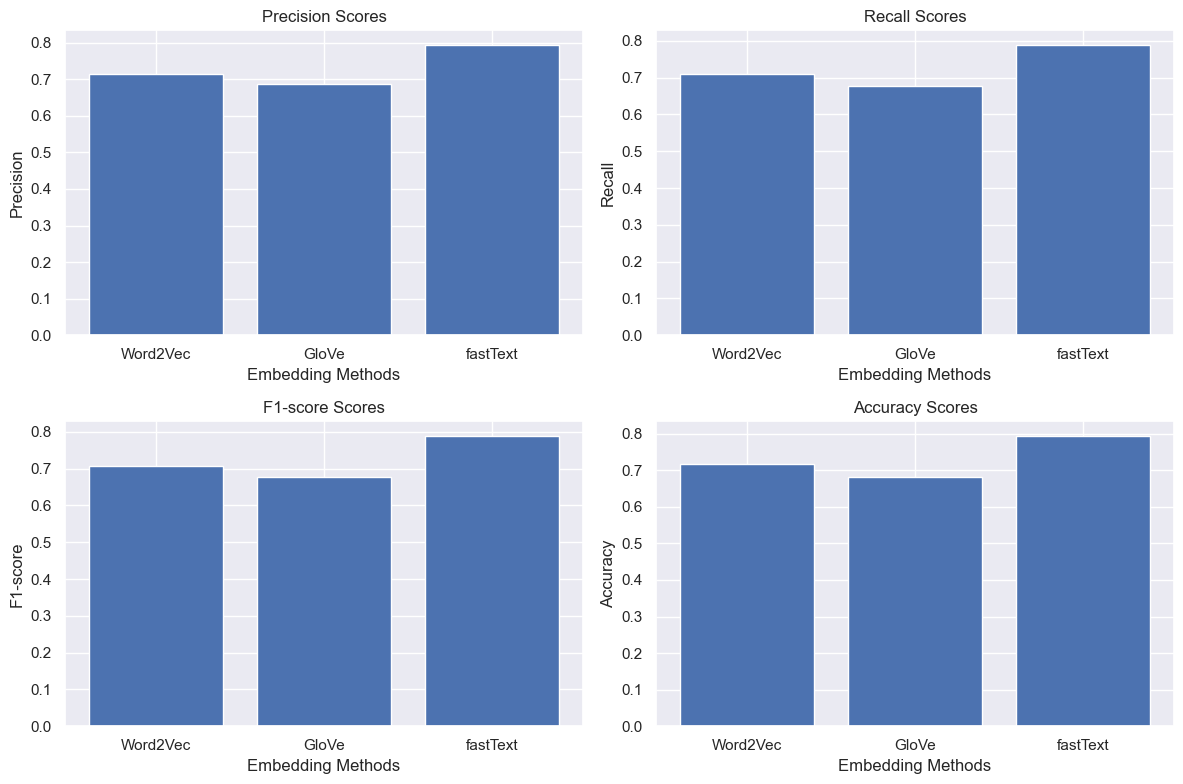

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

embedding_methods = ['Word2Vec', 'GloVe', 'fastText']

precision_w2v = precision_score(y_test, y_pred, average='macro')
precision_gloVe = precision_score(y_test, y_pred_gloVe, average='macro')
precision_fastText = precision_score(y_test, y_pred_fastText, average='macro')

recall_w2v = recall_score(y_test, y_pred, average='macro')
recall_gloVe = recall_score(y_test, y_pred_gloVe, average='macro')
recall_fastText = recall_score(y_test, y_pred_fastText, average='macro')

f1_w2v = f1_score(y_test, y_pred, average='macro')
f1_gloVe = f1_score(y_test, y_pred_gloVe, average='macro')
f1_fastText = f1_score(y_test, y_pred_fastText, average='macro')

accuracy_w2v = accuracy_score(y_test, y_pred)
accuracy_gloVe = accuracy_score(y_test, y_pred_gloVe)
accuracy_fastText = accuracy_score(y_test, y_pred_fastText)

precision = [precision_w2v, precision_gloVe, precision_fastText]
recall = [recall_w2v, recall_gloVe, recall_fastText]
f1 = [f1_w2v, f1_gloVe, f1_fastText]
accuracy = [accuracy_w2v, accuracy_gloVe, accuracy_fastText]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot precision
axes[0, 0].bar(embedding_methods, precision)
axes[0, 0].set_xlabel('Embedding Methods')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision Scores')

# Plot recall
axes[0, 1].bar(embedding_methods, recall)
axes[0, 1].set_xlabel('Embedding Methods')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_title('Recall Scores')

# Plot F1-score
axes[1, 0].bar(embedding_methods, f1)
axes[1, 0].set_xlabel('Embedding Methods')
axes[1, 0].set_ylabel('F1-score')
axes[1, 0].set_title('F1-score Scores')

# Plot Accuracy
axes[1, 1].bar(embedding_methods, accuracy)
axes[1, 1].set_xlabel('Embedding Methods')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Accuracy Scores')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Based on the classification reports for each of the individual embedding method, the following is the detailed summary:

For Word2Vec Embedding with SVM:
- Overall accuracy: 0.72
- The model performs well for several classes such as `alt.atheism`, `comp.graphics`, `comp.os.ms-windows.misc`, `rec.sport.baseball`, and `rec.sport.hockey`, with high precision, recall, and F1-scores.
- Some classes have relatively lower performance, such as `comp.sys.ibm.pc.hardware`, `comp.sys.mac.hardware`, and `talk.religion.misc`, with lower precision, recall, and F1-score.

For GloVe Embedding with SVM:
- Overall accuracy: 0.68
- The model performs reasonably well, but the performance is generally lower compared to the Word2Vec model.
- Some classes, such as `rec.sport.baseball`, `rec.sport.hockey`, `sci.med`, and `talk.politics.mideast`, have higher precision, recall, and F1-scores.
- Other classes, such as `alt.atheism`, `comp.sys.ibm.pc.hardware`, and `talk.religion.misc`, have lower performance.

For fastText Embedding with SVM:
- Overall accuracy: 0.80
- The model performs relatively well with higher precision, recall, and F1-scores across most classes.
- Classes like `sci.crypt`, `rec.sport.baseball`, `rec.sport.hockey`, and `talk.politics.mideast` have high performance.

<b>Based on these generated results, we see that the fastText model with SVM outperforms the Word2Vec and GloVe models in terms of overall accuracy and the majority of class-wise precision, recall, and F1-scores.</b><br>
However, it's important to consider other factors such as the tuning parameters of the classification model, the specific requirements of the task, the size of the dataset, and the computational resources available when choosing the most suitable embedding method for a particular application.

### Thoughts about the considered model, its pros and cons.

<b>SVM classification model is chosen to perform classification as they are powerful models for text classification. They can handle high-dimensional feature spaces, capture complex relationships, and are less prone to overfitting. SVMs with various kernels, such as linear, polynomial, or radial basis function, can be employed depending on the dataset.</b>

Based on the working of Support Vector Machine (SVM) model using the three embedding methods, the advantages and disadvantages of the model can be discussed:

<b>Advantages of SVM:</b>

Effective in High-Dimensional Spaces: SVM performs well in high-dimensional feature spaces, making it suitable for text classification tasks like the 20 Newsgroups dataset, which often involves a large number of features (words).

Non-Linear Classification: SVM can efficiently handle non-linear decision boundaries by using kernel functions. It allows the SVM to learn complex patterns and capture non-linear relationships in the data.

Robust to Overfitting: SVM is less prone to overfitting compared to other models, thanks to its regularization parameter (C). It controls the trade-off between maximizing the margin and minimizing the classification error, thus reducing the risk of overfitting.

Memory Efficiency: SVM uses a subset of training data (support vectors) to define the decision boundaries. Therefore, it requires less memory compared to models that store all training instances.

Ability to Handle Imbalanced Data: SVM can handle imbalanced datasets effectively by adjusting the class weights or using techniques like the SMOTE algorithm to create synthetic samples.

<b>Disadvantages of SVM:</b>

Computationally Intensive: Training an SVM on large datasets can be computationally expensive and time-consuming. The complexity of SVM training scales quadratically with the number of samples, making it less suitable for very large datasets.

Sensitivity to Parameter Tuning: SVM performance is highly sensitive to the choice of kernel and hyperparameter settings. Selecting the optimal parameters can be challenging and requires thorough experimentation and cross-validation.

Lack of Probability Estimates: SVM inherently provides binary classification outputs and does not directly estimate class probabilities. Additional techniques like Platt scaling or using alternative models like SVM with Probability Estimates (SVM-PE) can be employed to estimate probabilities.

Interpretability of Results: SVMs do not provide direct interpretability of feature importance or model internals. Understanding the underlying features driving the classification decision can be challenging with SVMs.

Limited Scalability to Large Datasets: SVMs can struggle with scalability when dealing with extremely large datasets, as the training time and memory requirements can become prohibitive.

Overall, SVM is a powerful and versatile model for text classification tasks.

#  Part 3: Text Clustering Model

# K-Means Clustering

## Using Word2Vec Embedding

In [56]:
# Perform K-means clustering on training data
k = 20  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_w2v_embeddings)
cluster_labels = kmeans.labels_
print(cluster_labels)

[ 0 19 19 ... 11 16  7]


In [57]:
# Evaluate K-means clustering
silhouette = silhouette_score(X_train_w2v_embeddings, cluster_labels)
homogeneity = homogeneity_score(y_train, cluster_labels)
completeness = completeness_score(y_train, cluster_labels)
v_measure = v_measure_score(y_train, cluster_labels)

print("K-means Clustering Metrics:")
print("Silhouette Score:", silhouette)
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-measure Score:", v_measure)
print()

K-means Clustering Metrics:
Silhouette Score: 0.0903916
Homogeneity Score: 0.3226243059587804
Completeness Score: 0.3370953658197871
V-measure Score: 0.3297011233463212



In [58]:
# Predict clusters for testing data
test_cluster_labels = kmeans.predict(X_test_w2v_embeddings)

# Print sample documents from each cluster
for cluster in range(k):
    cluster_docs = [X_test[i] for i in range(len(X_test)) if test_cluster_labels[i] == cluster]
    print(f"Cluster {cluster+1} - Sample Documents:")
    print("----------------------------------")
    for doc in cluster_docs[:5]:
        print(doc)
        print("----------------------------------")
    print("\n")

Cluster 1 - Sample Documents:
----------------------------------
From: PETCH@gvg47.gvg.tek.com (Chuck)
Subject: Daily Verse
Lines: 3

but whoever listens to me will live in safety and be at ease, without fear of
harm." 
Proverbs 1:33

----------------------------------
From: keith@balrog.dseg.ti.com (Keith A. Schauer)
Subject: Re: DoD Confessional
Organization: Texas Instruments Information Technology Group
Lines: 29

In article <1993Apr21.053721.551@bnr.ca> MBEAVING@BNR.CA writes:
>
>I hate pre'80s motorcycles.
>
>At first I thought it was a phase.  I though I would
>get used to them.  It didn't happen.  I tried gazing
>at CB750s and 900 customs, 

	Thats pretty hard since CB900 customs weren't introduced
	until 1980.  If you find a pre-80 one, hold onto it.  It
	will be worth big bucks some day.

>What am I to do?  Everytime I read a .sig containing 
>some spoked wheel wonder, I shudder and feel pity that
>the poor soul has suffered enough.  

	Mine has comstar wheels.  Methinks you 

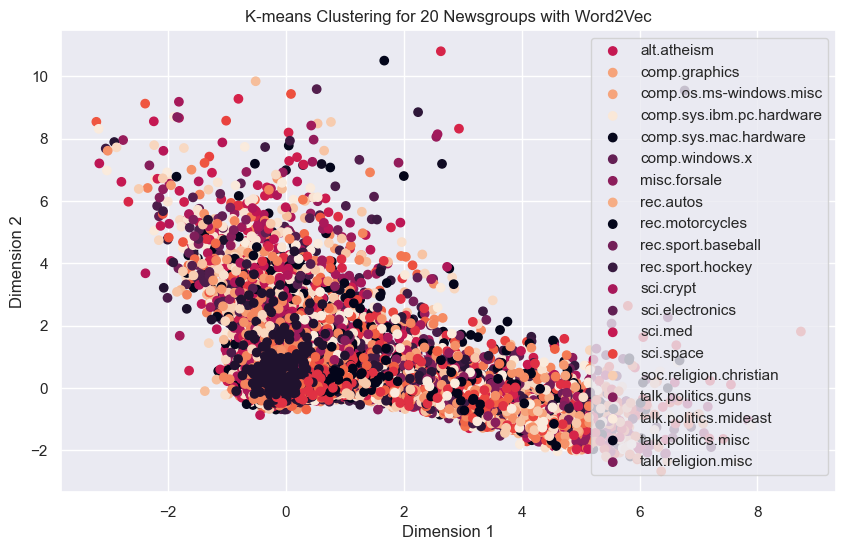

In [93]:
#Reducing dimensions for visualization
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(w2v_model.wv.vectors)

# Plot the clusters
plt.figure(figsize=(10, 6))
num_clusters=k

for i, label in enumerate(data.target_names):
    indices = np.where(data.target == i)[0]
    cluster_indices = kmeans.predict(w2v_model.wv.vectors[indices])
    cluster_color = [random.random() for _ in range(num_clusters)]
    plt.scatter(word_vectors_2d[indices, 0], word_vectors_2d[indices, 1], c=[cluster_color[c] for c in cluster_indices])

plt.title('K-means Clustering for 20 Newsgroups with Word2Vec')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(data.target_names)
plt.show()

## Using gloVe Embedding

In [127]:
# Perform K-means clustering on training data
k = 20  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_gloVe_embeddings)
cluster_labels = kmeans.labels_
print(cluster_labels)

[ 2  2  8 ... 10 11  4]


In [128]:
# Evaluate K-means clustering
silhouette = silhouette_score(X_train_gloVe_embeddings, cluster_labels)
homogeneity = homogeneity_score(y_train, cluster_labels)
completeness = completeness_score(y_train, cluster_labels)
v_measure = v_measure_score(y_train, cluster_labels)

print("K-means Clustering Metrics:")
print("Silhouette Score:", silhouette)
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-measure Score:", v_measure)
print()

K-means Clustering Metrics:
Silhouette Score: 0.04696209182904645
Homogeneity Score: 0.335199520875636
Completeness Score: 0.34476290857143427
V-measure Score: 0.3399139621958517



In [129]:
# Predict clusters for testing data
test_cluster_labels = kmeans.predict(X_test_gloVe_embeddings)

# Print sample documents from each cluster
for cluster in range(k):
    cluster_docs = [X_test[i] for i in range(len(X_test)) if test_cluster_labels[i] == cluster]
    print(f"Cluster {cluster+1} - Sample Documents:")
    print("----------------------------------")
    for doc in cluster_docs[:5]:
        print(doc)
        print("----------------------------------")
    print("\n")

Cluster 1 - Sample Documents:
----------------------------------
From: donb@netcom.com (Don Baldwin)
Subject: A picture is worth a thousand words...
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 531

begin 644 outOfControl.gif
M1TE&.#=AN@*6`?```````/___RP`````N@*6`0`"_@Q@J)O-[XQ4#IYX::Z3
M9PUB4ZAY9`<NY59*:/!2L0C-J^W>2(>?[-C3Q70,6A`H9)&2OA=*ELQ)?RW+
MP3HT5F%1RQ%INGZNVMF4&WR0?4+>"OO!,-7(-SO,K#^I=2_<=J?4,QB(`X-V
MN)-X>+;C1^B&UI7C&#E)=7E&F)?9"?9X`OEH.77CE(*I!5KI^08H-I8PMC9:
M26HW"RLFN]LK>@NH1PN[UT>YQ,&ETL#[)#=BVO0<ZZ=VB7S=**D)!?G+\]M&
M%`[<2MY]$=[*JFW8V>6ZYHSZG6V.#DVZ-XS?[8*X:`@M6;SB;5M'<""U3VS&
M-5E5J-JT8)P<%>&#$=I#_CH2O40*")#=/6\.3QW,(JY,IB,C4[6\-Y(EPTW"
MRIP[*:AB'X>Z/"K2MV5805T:/YD@28G&LIQ+AVY,6$%G"@]4X]"SVM2:THGS
M;MIJ$9)1/W<AO'I]-S%F2S-!SU9URXFBW))7N[95E!'4W*':5+CZ*(/;W+'R
M\DK9Q-$HUH4/56*+.C5K6L<'$V-%*>HQQ\O,P.+#:7>0RLJAS:+]LW:2Z:BC
M8:KK.QAQW-2FK;+MR><?(Y-X<1:V,YEVQXB1;5\&'E$.J]\S>\7;$!RSY7G2
MTGT]+%:WZW&B]=*%2U.U2(3>*<)[FRUT68-87I>_N_I:3DF2`\/^UWLI

C:\Users\adeebafa\AppData\Local\Temp\ipykernel_71552\1494253424.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], c=colors[i])


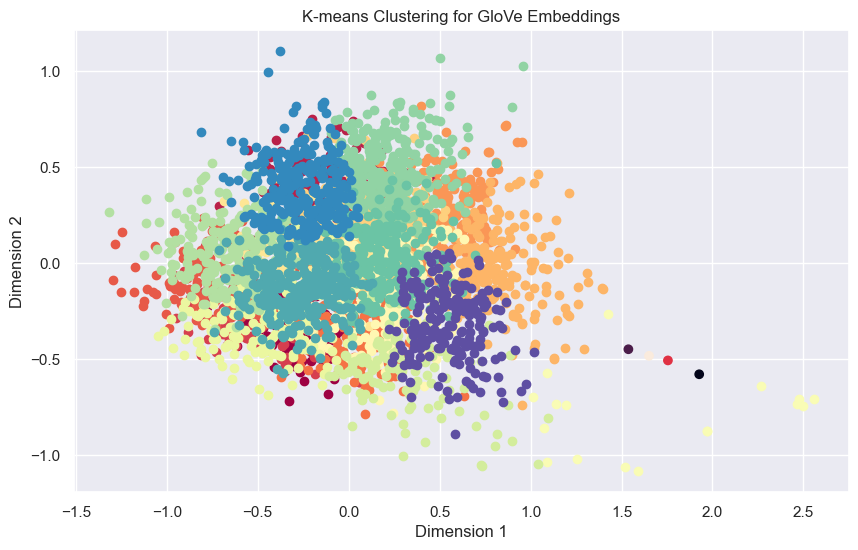

In [111]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(X_test_gloVe_embeddings)

# Perform k-means clustering
k = 20  # Number of clusters
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X_test_gloVe_embeddings)

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, k))

for i in range(k):
    indices = np.where(cluster_labels == i)[0]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], c=colors[i])

plt.title('K-means Clustering for GloVe Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Using FastText Embedding

In [130]:
# Perform K-means clustering on training data
k = 20  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_fastText_embeddings)
cluster_labels = kmeans.labels_
print(cluster_labels)

[ 4  1  1 ...  7 13 17]


In [131]:
# Evaluate K-means clustering
silhouette = silhouette_score(X_train_fastText_embeddings, cluster_labels)
homogeneity = homogeneity_score(y_train, cluster_labels)
completeness = completeness_score(y_train, cluster_labels)
v_measure = v_measure_score(y_train, cluster_labels)

print("K-means Clustering Metrics:")
print("Silhouette Score:", silhouette)
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-measure Score:", v_measure)
print()

K-means Clustering Metrics:
Silhouette Score: 0.058582954853330406
Homogeneity Score: 0.44683577773614497
Completeness Score: 0.4645821284013577
V-measure Score: 0.455536182180769



In [132]:
# Predict clusters for testing data
test_cluster_labels = kmeans.predict(X_train_fastText_embeddings)

# Print sample documents from each cluster
for cluster in range(k):
    cluster_docs = [X_test[i] for i in range(len(X_test)) if test_cluster_labels[i] == cluster]
    print(f"Cluster {cluster+1} - Sample Documents:")
    print("----------------------------------")
    for doc in cluster_docs[:5]:
        print(doc)
        print("----------------------------------")
    print("\n")

Cluster 1 - Sample Documents:
----------------------------------
From: kayd@prism.CS.ORST.EDU (Kayd)
Subject: Texas Star DX350 Linear Amplifier or Tornado 100 Linear $150/$100
Keywords: 10m linear amplifier watts HF
Article-I.D.: flop.1qshlgINNb3n
Distribution: usa
Organization: Oregon State University, Computer Science Dept.
Lines: 16
NNTP-Posting-Host: prism.cs.orst.edu

Looking for an amateur radio operator that needs a variable power linear
amplifier for 2-30MHz.  Looks and works like new.  Runs off 12v for mobile
use.  Input: 5-10 watts  Output: ~175 watts AM, ~350 watts PEP SSB.
I need $150 out of it.

If that's too much, I also have a Tornado 100 that takes 5w in and
100/250w out for $100.

Reply with your callsign, address and phone number for verification of license.

Prices do NOT include shipping/packaging.

Darrek Kay
Kayd@Prism.cs.orst.edu
(503)737-9410
KB7RVD

----------------------------------
From: omar@godzilla.osf.org (Mark Marino)
Subject: WANTED: Playmation Info
Org

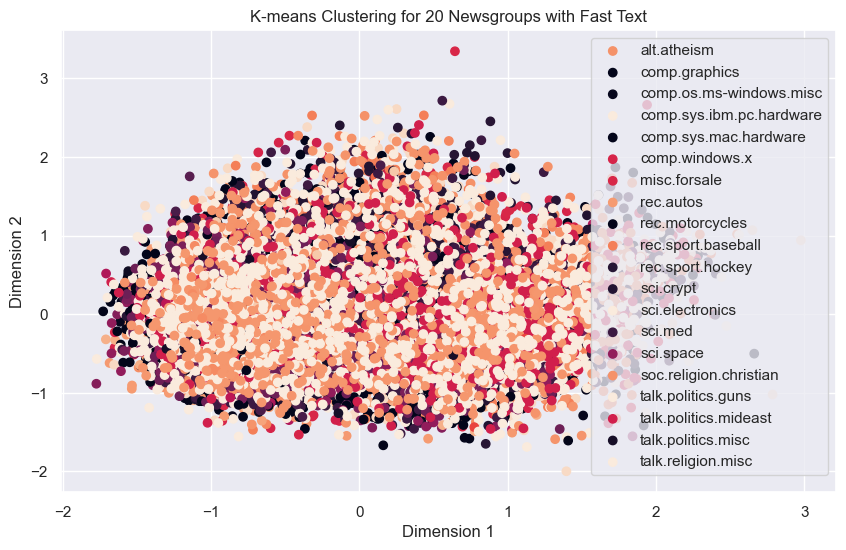

In [95]:
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(fastText_model.wv.vectors)

# Plot the clusters
plt.figure(figsize=(10, 6))
num_clusters=k

for i, label in enumerate(data.target_names):
    indices = np.where(data.target == i)[0]
    cluster_indices = kmeans.predict(fastText_model.wv.vectors[indices])
    cluster_color = [random.random() for _ in range(num_clusters)]
    plt.scatter(word_vectors_2d[indices, 0], word_vectors_2d[indices, 1], c=[cluster_color[c] for c in cluster_indices])

plt.title('K-means Clustering for 20 Newsgroups with Fast Text')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(data.target_names)
plt.show()

### Performance of k-means clustering model with the embedding methods

Based on the above clustering metrics for each embedding method, the results suggest that K-means clustering with<b> word2vec embeddings perform better</b> compared to K-means clustering with gloVe and fastText embeddings.<br>

The silhouette score measures the compactness and separation of clusters, where higher values indicate better-defined clusters. In this case, the word2vec embeddings yield a higher silhouette score compared to gloVe and fastText.<br>

The homogeneity, completeness, and V-measure scores assess the extent to which clusters capture the true class labels. Higher scores indicate better agreement between clusters and class labels. The word2vec embeddings show higher homogeneity, completeness, and V-measure scores, indicating better alignment between clusters and class labels.<br>

Therefore, based on these metrics, word2vec embeddings yield better clustering results for the this dataset compared to gloVe and fastText embeddings when using the K-means algorithm.

# Comprehensive discussion on the choice of the clustering model

K-means clustering is a popular unsupervised machine learning algorithm used for clustering data into groups or clusters based on their similarity. It is commonly applied to text data for tasks like document clustering, topic modeling, and text segmentation. 
Let's discuss the pros and cons of using the K-means clustering model for the 20 Newsgroups dataset:

<b>Pros of K-means clustering:</b>

1.<b> Simplicity:</b> K-means is a relatively simple and easy-to-understand algorithm. It is straightforward to implement and interpret the results.

2.<b> Scalability:</b> K-means is computationally efficient and can handle large datasets with a large number of samples. It can scale well to a high number of dimensions.

3.<b> Speed:</b> K-means converges quickly, especially for well-separated clusters. It is faster compared to some other clustering algorithms.

4.<b> Cluster Interpretability:</b> K-means produces hard cluster assignments, which means each data point is assigned to a single cluster. This makes it easier to interpret the resulting clusters and assign labels to them.

5.<b> Versatility:</b> K-means can work with any type of numeric data, including text data after appropriate vectorization and transformation.

<b>Cons of K-means clustering:</b>

1.<b> Assumes Circular Clusters:</b> K-means assumes that the clusters are spherical and of similar size, which may not be suitable for datasets with irregularly shaped or overlapping clusters. It may lead to suboptimal results in such cases.

2.<b>Sensitivity to Initializations</b>: K-means is sensitive to the initial placement of centroids. Different initializations can lead to different results, and there is a possibility of converging to local optima instead of the global optimum.

3.<b>Requires Predefined Number of Clusters:</b> K-means requires specifying the number of clusters (K) in advance. Determining the optimal number of clusters can be challenging and may require domain expertise or additional analysis.

4.<b> Limited to Numeric Features:</b> K-means operates on numerical features and does not handle categorical or textual data directly. Preprocessing steps like vectorization or feature engineering are necessary to convert text data into numerical representations suitable for K-means.

5.<b>Outliers Impact:</b> K-means is sensitive to outliers, as they can significantly influence the centroid positions and distort the clustering results. Outliers need to be handled appropriately before applying K-means.

6.<b>Lack of Robustness:</b> K-means may not perform well with datasets having uneven cluster sizes or varying cluster densities. It assumes an equal influence of each feature, which can be problematic when dealing with high-dimensional data.


# Part 4: Model Evaluation 

To evaluate SVM models,the following metrics are used:

<b>Accuracy:</b> Accuracy measures the overall correctness of the model's predictions by calculating the ratio of correctly classified instances to the total number of instances. It is a widely used metric for classification tasks. However, accuracy alone may not provide a complete picture, especially in imbalanced datasets.

<b>Precision:</b> Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on the quality of the positive predictions and is useful when the cost of false positives is high. Precision is calculated as TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.

<b>Recall (Sensitivity or True Positive Rate):</b> Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on the ability of the model to identify positive instances correctly and is useful when the cost of false negatives is high. Recall is calculated as TP / (TP + FN), where FN is the number of false negatives.

<b>F1-score:</b> The F1-score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance. It combines precision and recall into a single metric, considering both the quality and quantity of predictions. The F1-score is calculated as 2 * (Precision * Recall) / (Precision + Recall).

<b>Confusion Matrix:</b> The confusion matrix provides a tabular representation of the model's predictions versus the true labels. It includes information about true positives, true negatives, false positives, and false negatives. The confusion matrix helps in understanding the distribution of predictions across different classes and identifying specific areas where the model may be struggling.

It's important to consider the interplay between these metrics when evaluating an SVM model on the 20 Newsgroups dataset. Depending on the specific requirements of the task, emphasis may be placed on different metrics. For example, if the goal is to minimize false positives, precision becomes crucial. On the other hand, if capturing all instances of a particular newsgroup is important, recall takes precedence.

These metrics collectively offer a more nuanced understanding of the model's performance and its effectiveness in classifying the diverse range of newsgroup categories.
Combination of these metrics can be used to obtain a comprehensive evaluation of the SVM models.

# Part 5: Model Improvement Discussion

When working with the 20 Newsgroups dataset and using SVM and K-means clustering models, there are several potential improvements that can be considered to address various challenges:

1. Handling unbalanced data:
   - If the dataset has imbalanced class distributions, where certain classes have significantly more instances than others, it can lead to biased models. Techniques such as oversampling the minority class, undersampling the majority class, or using more advanced methods like SMOTE (Synthetic Minority Over-sampling Technique) can help balance the dataset.
   - Additionally, adjusting class weights in the SVM model can give more importance to minority classes during the training process.

2. Dealing with slang, abbreviations, or typos:
   - Preprocessing steps like text normalization and cleaning can help address variations in language use. Techniques such as removing punctuation, converting text to lowercase, and expanding contractions can make the text more consistent.
   - Handling slang, abbreviations, and typos can be challenging. Creating a custom dictionary or using external resources like word embeddings trained on large corpora can help identify and replace slang words or abbreviations with their corresponding standard forms.

3. Addressing context and word disambiguation challenges:
   - Contextual embeddings like BERT (Bidirectional Encoder Representations from Transformers) or ELMo (Embeddings from Language Models) can capture the contextual meaning of words and disambiguate them based on the surrounding text. These embeddings can provide more accurate representations of words and improve the performance of the models in capturing context-specific information.
   - Leveraging pre-trained language models and fine-tuning them on the 20 Newsgroups dataset can enhance the models' understanding of the text by incorporating broader linguistic knowledge.

4. Applying domain-specific feature engineering:
   - For text classification tasks, domain-specific feature engineering can be useful. Creating features like n-grams (sequences of adjacent words), part-of-speech tags, or using domain-specific lexicons can capture specific characteristics of the text related to the 20 Newsgroups dataset.
   - Feature engineering techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings (e.g., word2vec, GloVe, fastText) can also help capture semantic information and improve the models' performance.

5. Exploring ensemble methods:
   - Ensemble methods like bagging or boosting can be employed to combine multiple SVM or K-means clustering models to improve their overall performance. By training multiple models with different initializations or hyperparameters and aggregating their predictions, ensemble methods can enhance the robustness and generalization of the models.

6. Tuning hyperparameters:
   - Fine-tuning the hyperparameters of the SVM model or K-means clustering model can significantly impact their performance. Techniques like grid search or random search can be used to explore different combinations of hyperparameters and select the best ones based on cross-validation performance.

Note: Experimentation and iterative refinement are often necessary to determine the most effective strategies.